# Final Project: Data Cleaning & Exploratory Data Analysis

### Hotel Booking Dataset

> Author: *Haneul Kim* (ttcielott)

- Repository: https://github.com/ttcielott/haneul_kim/tree/master/Data_EDA_Project_04_Hotel_Booking
- Overview & Assesment: https://github.com/ttcielott/haneul_kim/blob/master/Data_EDA_Project_04_Hotel_Booking/InitialAssessment.pdf

## Hotel Booking

### Basic Inforamtion About Data
**Location**
- data from 2 different hotels: Resort hotel and City hotel
- both hotels are located in Portugal (Southern Europe) 
- Hotel 1 at the resort region of Algarve.
- Hotel 2 at the city of Lisbon.
- The distance between these two locations is ca. 280 km by car.
- both locations border on the North Atlantic.

- Reference: publication(https://www.sciencedirect.com/science/article/pii/S2352340918315191), 

**Booking Period**
- bookings due to arrival between July 1st, 2015 to August 31st, 2017.
- To answer most questions, I will only use actual guest numbers from bookings that were not canceled. 

### EDA
#### Questions to Answer
- Where do the guests come from?
- How much do guests pay for a room per night?
- How does the price per night vary over the year?
- What are the busiest months?
- How long do people stay at the hotels?
- Bookings by market segment?
- How many bookings were cancelled?
- Which month have the highest number of cancellation?

In [1]:
# import libraries

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

In [2]:
# set some display options
sns.set(style='whitegrid')
pd.set_option('display.max_columns',36)

In [3]:
# load data
file_path='hotel_bookings.csv'
full_data=pd.read_csv(file_path)

In [4]:
full_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [73]:
full_data.shape

(119390, 32)

In [5]:
# check missing values
full_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Missing data**
1. children: 4  
I will replace them with 0.
2. country: 488    
I will replace them with 'Unknown.'
3. agent: 16,340  
If no agency is given, booking was most likely made without one, so I will replace them with 0.
4. company: 112,593   
If none given, it was mostly likely that there was no extra guest. I will replace them with 0.

In [6]:
# replace missing values
repl={'children':0.0,
     'country': 'Unknown',
     'agent':0,
     'company':0}
full_data_cln=full_data.fillna(repl)

In [7]:
# convert 'Undefined' in the column 'meal' into 'SC'
full_data_cln['meal'].replace('Undefined','SC', inplace=True)

In [8]:
# drop rows with 0 adult, 0 children, and 0 baby
zero_guest=list(full_data_cln.loc[full_data_cln['adults']+
               full_data_cln['children']+
               full_data_cln['babies']==0].index)
full_data_cln.drop(full_data_cln.index[zero_guest], inplace=True)

In [9]:
# view the size of cleaned data
full_data_cln.shape

(119210, 32)

## EDA

In [10]:
# separate Resort and City hotel excluding bookings cancelled 
rh= full_data_cln.loc[(full_data_cln['hotel']=='Resort Hotel')&(full_data_cln['is_canceled']==0)]
ch= full_data_cln.loc[(full_data_cln['hotel']=='City Hotel')&(full_data_cln['is_canceled']==0)]

### Where do the guests come from?

In [11]:
# obtain the number of actual guests by country
country_data=pd.DataFrame(full_data_cln.loc[full_data_cln['is_canceled']==0]['country'].value_counts())
country_data.head()

country
PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067

In [12]:
# rename the column
country_data.rename(columns={'country':'Number of Guests'}, inplace=True)
country_data.head()

Number of Guests
PRT             20977
GBR              9668
FRA              8468
ESP              6383
DEU              6067

In [13]:
# get the sume of the number of guests
total_guests=country_data['Number of Guests'].sum()
total_guests

75011

In [14]:
# create the column 'Guests in %'
country_data['Guests in %']=round(
    country_data['Number of Guests']/total_guests *100,2)
country_data['Guests in %']

PRT    27.97
GBR    12.89
FRA    11.29
ESP     8.51
DEU     8.09
       ...  
MLI     0.00
PLW     0.00
SMR     0.00
AIA     0.00
BDI     0.00
Name: Guests in %, Length: 166, dtype: float64

In [15]:
# name the index
country_data['country']=country_data.index
country_data.head()

Number of Guests  Guests in % country
PRT             20977        27.97     PRT
GBR              9668        12.89     GBR
FRA              8468        11.29     FRA
ESP              6383         8.51     ESP
DEU              6067         8.09     DEU

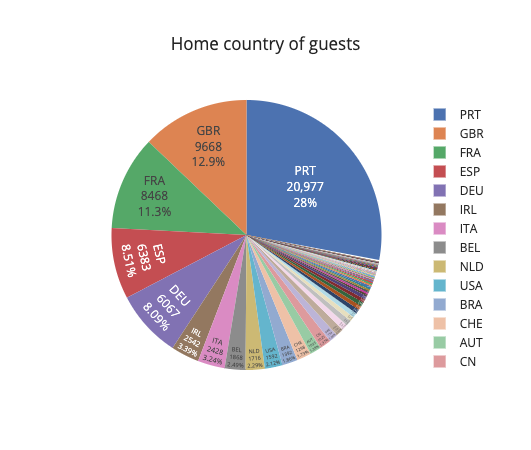

In [16]:
# plot the dataframe
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template='seaborn')
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

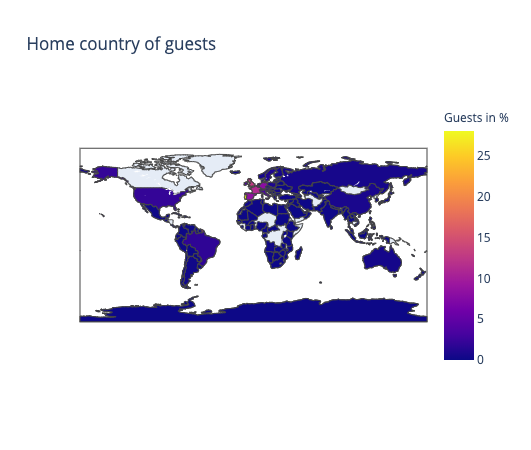

In [17]:
# show on map
guest_map=px.choropleth(country_data,
                       locations=country_data.index,
                       color=country_data['Guests in %'],
                       hover_name=country_data.index,
                       color_continuous_scale=px.colors.sequential.Plasma,
                       title='Home country of guests')
guest_map.show()

People from all over the world are staying in these two hotel; Most guests are from Portugal and other countries in Europe.

### How much do guests pay for a room per night?

No currency information is given, but Portugalis part of the European Monetary Union, so I assume that the currency unit here is all Euro. 

In [18]:
# count adult and children as paying guests excluding babies
rh['adr_pp']=rh['adr']/(rh['adults']+rh['children'])
ch['adr_pp']=ch['adr']/(ch['adults']+ch['children'])

/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
print("""From all non-cancelled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} Euro per night and person.
City hotel: {:.2f} Euro night and person."""
      .format(rh['adr_pp'].mean(),
              ch['adr_pp'].mean()))

From all non-cancelled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 Euro per night and person.
City hotel: 59.27 Euro night and person.


In [20]:
# normalize price per night (adr)

# add the column 'adr_pp', which is the average daily price divided by the sum of adults and children.
full_data_cln['adr_pp']=full_data_cln['adr']/(full_data_cln['adults']+full_data_cln['children'])
# pick rows of the booking without cancellation
full_data_guests= full_data_cln.loc[full_data_cln['is_canceled']==0]
# create dataframe with the columns of 'hotel','reserved_room_tye', and 'adr_pp' and sort rows by 'reserved_room_type'
room_prices= full_data_guests[['hotel','reserved_room_type','adr_pp']].sort_values('reserved_room_type')
room_prices.head()

hotel reserved_room_type  adr_pp
119389  City Hotel                  A   75.60
102432  City Hotel                  A   89.55
77019   City Hotel                  A   53.00
77020   City Hotel                  A   53.00
77021   City Hotel                  A   50.40

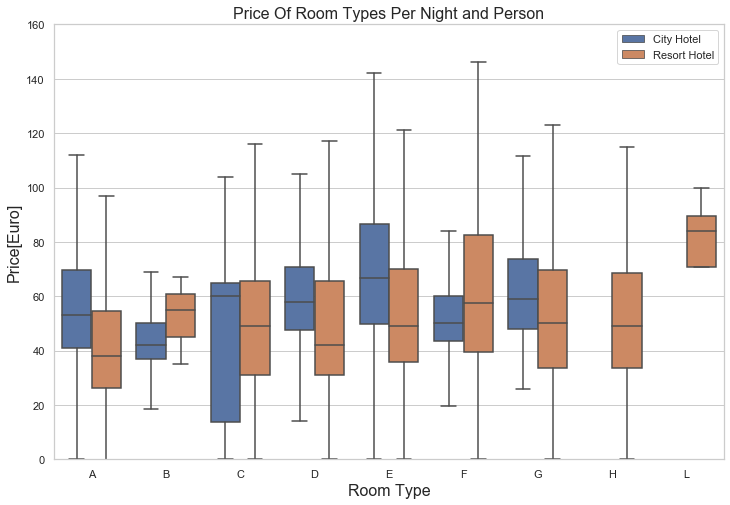

In [21]:
# create the boxplot to compare price by categories
# set the size of boxplot of width 12 inches, height 8 inches.
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
           y='adr_pp',
           hue='hotel',
           data=room_prices,
           hue_order=['City Hotel','Resort Hotel'],
           fliersize=0)
plt.title('Price Of Room Types Per Night and Person', fontsize=16)
plt.ylabel('Price[Euro]', fontsize=16)
plt.xlabel('Room Type', fontsize=16)
plt.legend(loc='upper right')
plt.ylim(0,160)
plt.show()

This figure shows the average price per room by room types and standard deviation. It appears that the relationship between room type and price as well as between the same room types of each hotel isn't very clear. 
Note that due to data anonymization, rooms with the same type letter may not necessarily be the same across hotels.

### How does the price per night vary over the year?

In [22]:
# create a dataframe with the related columns
room_prices_monthly=full_data_guests[['hotel','arrival_date_month','adr_pp']]
room_prices_monthly.head()

hotel arrival_date_month  adr_pp
0  Resort Hotel               July     0.0
1  Resort Hotel               July     0.0
2  Resort Hotel               July    75.0
3  Resort Hotel               July    75.0
4  Resort Hotel               July    49.0

In [23]:
# sort the dataframe by month
ordered_months=['January','February','March','April','May',
               'June','July','August','September','October','November','December']
room_prices_monthly['arrival_date_month']=pd.Categorical(room_prices_monthly['arrival_date_month'], categories=ordered_months, ordered=True)
room_prices_monthly.sort_values('arrival_date_month').head()

/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hotel arrival_date_month  adr_pp
104561    City Hotel            January  33.575
19886   Resort Hotel            January  13.000
19885   Resort Hotel            January  13.000
19884   Resort Hotel            January   4.000
19883   Resort Hotel            January  39.000

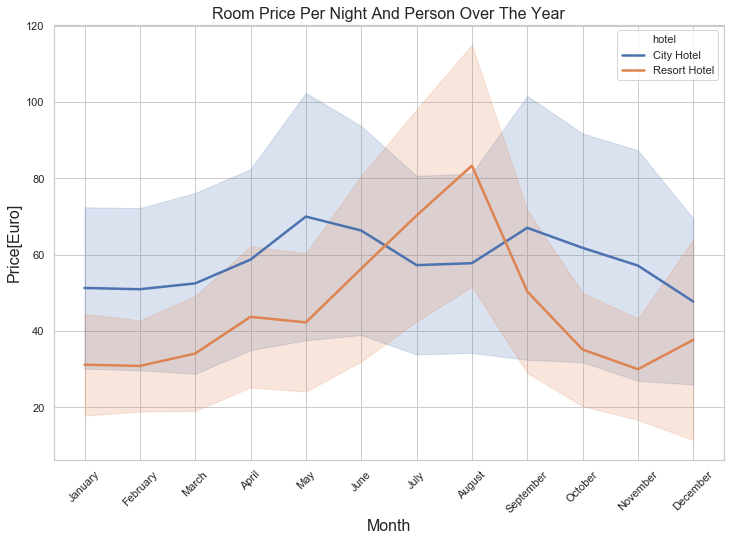

In [24]:
# plot the dataframe with lineplot
plt.figure(figsize=(12,8)) #figure size is of width 12 inches and height 8 inches
sns.lineplot(x='arrival_date_month', y='adr_pp', 
              hue='hotel', hue_order=['City Hotel','Resort Hotel'],
             size='hotel',sizes=(2.5,2.5),
             ci='sd',
             data=room_prices_monthly)
plt.title('Room Price Per Night And Person Over The Year', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Price[Euro]', fontsize=16)
plt.xticks(rotation=45)
plt.show()

The line plot above illustrates that City Hotel's room prices were high than Resort Hotel's all around year except during summer season, June to August,as we can normally expect. 
The price of City Hotel varies less and was most expensive in May and September.

### What are the busiest months?

In [25]:
# count the 
resort_guests_monthly=rh.groupby('arrival_date_month')['hotel'].count()  #group by month and take the column 'hotel' only
resort_guests_monthly.head()

arrival_date_month
April       2550
August      3257
December    2014
February    2308
January     1866
Name: hotel, dtype: int64

In [26]:
# create a new dataframe with the pertinent data
city_guests_monthly=ch.groupby('arrival_date_month')['hotel'].count()  #group by month and take the column 'hotel' only
city_guests_monthly.head()

arrival_date_month
April       4010
August      5367
December    2377
February    3051
January     2249
Name: hotel, dtype: int64

In [27]:
# create a dataframe of the number of guests of Resort Hotel of each month.
resort_guest_data= pd.DataFrame({'month':list(resort_guests_monthly.index),
                                'hotel':'Resort hotel',
                                'guests':list(resort_guests_monthly.values)})
resort_guest_data.head()

month         hotel  guests
0     April  Resort hotel    2550
1    August  Resort hotel    3257
2  December  Resort hotel    2014
3  February  Resort hotel    2308
4   January  Resort hotel    1866

In [28]:
# create a dataframe of the number of guests of city Hotel of each month.
city_guest_data=pd.DataFrame({'month':list(city_guests_monthly.index),
                                'hotel':'City hotel',
                                'guests':list(city_guests_monthly.values)})
city_guest_data.head()

month       hotel  guests
0     April  City hotel    4010
1    August  City hotel    5367
2  December  City hotel    2377
3  February  City hotel    3051
4   January  City hotel    2249

In [29]:
# conbine two dataframes
full_guest_data=pd.concat([resort_guest_data, city_guest_data], ignore_index=True)
full_guest_data

month         hotel  guests
0       April  Resort hotel    2550
1      August  Resort hotel    3257
2    December  Resort hotel    2014
3    February  Resort hotel    2308
4     January  Resort hotel    1866
5        July  Resort hotel    3137
6        June  Resort hotel    2037
7       March  Resort hotel    2571
8         May  Resort hotel    2535
9    November  Resort hotel    1975
10    October  Resort hotel    2575
11  September  Resort hotel    2102
12      April    City hotel    4010
13     August    City hotel    5367
14   December    City hotel    2377
15   February    City hotel    3051
16    January    City hotel    2249
17       July    City hotel    4770
18       June    City hotel    4358
19      March    City hotel    4049
20        May    City hotel    4568
21   November    City hotel    2676
22    October    City hotel    4326
23  September    City hotel    4283

In [30]:
# sort the dataframe by month
full_guest_data['month']=pd.Categorical(full_guest_data['month'], categories=ordered_months, ordered=True)

In [31]:
# Due to the period of data collection, data was collected in July and August for 3 years and in the rest of months for 2 years
# fix this issue through data normalization
full_guest_data.loc[(full_guest_data['month']=='July')|(full_guest_data['month']=='August'),'guests'] /= 3    
full_guest_data.loc[~((full_guest_data['month']=='July')|(full_guest_data['month']=='August')),'guests'] /= 2
full_guest_data

month         hotel       guests
0       April  Resort hotel  1275.000000
1      August  Resort hotel  1085.666667
2    December  Resort hotel  1007.000000
3    February  Resort hotel  1154.000000
4     January  Resort hotel   933.000000
5        July  Resort hotel  1045.666667
6        June  Resort hotel  1018.500000
7       March  Resort hotel  1285.500000
8         May  Resort hotel  1267.500000
9    November  Resort hotel   987.500000
10    October  Resort hotel  1287.500000
11  September  Resort hotel  1051.000000
12      April    City hotel  2005.000000
13     August    City hotel  1789.000000
14   December    City hotel  1188.500000
15   February    City hotel  1525.500000
16    January    City hotel  1124.500000
17       July    City hotel  1590.000000
18       June    City hotel  2179.000000
19      March    City hotel  2024.500000
20        May    City hotel  2284.000000
21   November    City hotel  1338.000000
22    October    City hotel  2163.000000
23  September    City hotel  2141.500000

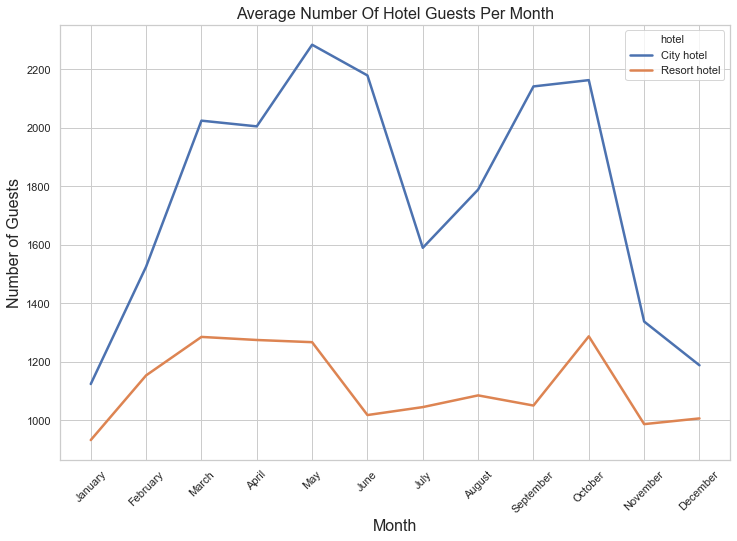

In [32]:
# plot the dataframe
plt.figure(figsize=(12,8))
sns.lineplot(x='month', y='guests',
            hue='hotel', hue_order=['City hotel','Resort hotel'], 
            size='hotel', sizes=(2.5,2.5),
            data=full_guest_data)
plt.title('Average Number Of Hotel Guests Per Month', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Guests', fontsize=16)
plt.xticks(rotation=45)
plt.show()

For City hotel, the busiest months were of spring and fall, of which room prices were the highest. In months of summer, it showed that they had the lowest number of guests.

On the other hand, for Resort hotel, the busiest months were also of spring and fall while the off-season months were of summer, June to September.

Both hotels have the fewest guests during winter.

### How long do people stay at hotels?

In [33]:
# create a dataframe with the pertinent data
rh['total_nights']=rh['stays_in_weekend_nights']+rh['stays_in_week_nights']
ch['total_nights']=ch['stays_in_weekend_nights']+ch['stays_in_week_nights']

/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/haneul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
# obtain the number of booking by the number of nights for stay at Resort hotel
rh['total_nights'].value_counts()

1     6579
2     4488
7     4434
3     3828
4     3321
5     1899
6     1205
10     699
14     630
8      509
9      408
0      371
11     240
12      89
13      75
21      35
15      23
28      22
25      14
16      12
17      11
22       7
35       5
18       5
19       4
42       3
30       2
29       2
45       1
46       1
56       1
60       1
69       1
38       1
23       1
Name: total_nights, dtype: int64

In [35]:
# save the number of nights in list 'num_nights_resort'
num_nights_resort=list(rh['total_nights'].value_counts().index)
num_nights_resort

[1,
 2,
 7,
 3,
 4,
 5,
 6,
 10,
 14,
 8,
 9,
 0,
 11,
 12,
 13,
 21,
 15,
 28,
 25,
 16,
 17,
 22,
 35,
 18,
 19,
 42,
 30,
 29,
 45,
 46,
 56,
 60,
 69,
 38,
 23]

In [36]:
# save the counts in the list 'num_booking_resort'
num_bookings_resort=list(rh['total_nights'].value_counts())
num_bookings_resort

[6579,
 4488,
 4434,
 3828,
 3321,
 1899,
 1205,
 699,
 630,
 509,
 408,
 371,
 240,
 89,
 75,
 35,
 23,
 22,
 14,
 12,
 11,
 7,
 5,
 5,
 4,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [37]:
# obtain the percentage rate of each nights for stay.
per_bookings_resort=rh['total_nights'].value_counts()/sum(num_bookings_resort)*100
per_bookings_resort.head()

1    22.743458
2    15.514917
7    15.328240
3    13.233311
4    11.480624
Name: total_nights, dtype: float64

In [38]:
# do the same for City hotel
num_nights_city=list(ch['total_nights'].value_counts().index)
num_bookings_city=list(ch['total_nights'].value_counts())
per_bookings_city=ch['total_nights'].value_counts()/sum(num_bookings_city)*100
per_bookings_city.head()

3    25.798542
2    23.832567
1    19.865897
4    16.695599
5     6.965541
Name: total_nights, dtype: float64

In [39]:
# create dataframes.
resort_nights=pd.DataFrame({'hotel':'Resort hotel',
                           'number_of_nights':num_nights_resort,
                           'percentage':per_bookings_resort})
city_nights=pd.DataFrame({'hotel':'City hotel',
                           'number_of_nights':num_nights_city,
                           'percentage':per_bookings_city})

In [40]:
# combine two dataframes
nights_data=pd.concat([resort_nights,city_nights], ignore_index=True)
nights_data.head()

hotel  number_of_nights  percentage
0  Resort hotel                 1   22.743458
1  Resort hotel                 2   15.514917
2  Resort hotel                 7   15.328240
3  Resort hotel                 3   13.233311
4  Resort hotel                 4   11.480624

In [41]:
nights_data.tail()

hotel  number_of_nights  percentage
57  City hotel                18     0.00217
58  City hotel                20     0.00217
59  City hotel                34     0.00217
60  City hotel                21     0.00217
61  City hotel                24     0.00217

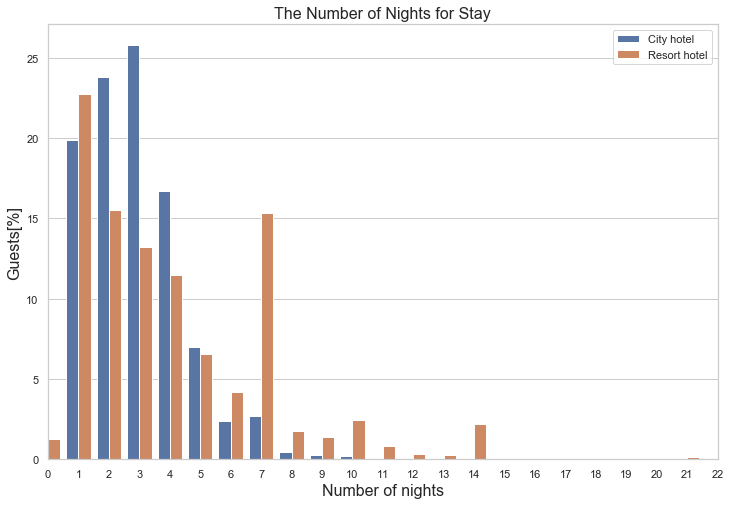

In [42]:
# plot the dataframe, night_data with barplot
plt.figure(figsize=(12,8))
sns.barplot(x='number_of_nights', y='percentage', data=nights_data,
          hue='hotel', hue_order=['City hotel', 'Resort hotel'])

plt.title('The Number of Nights for Stay', fontsize=16)
plt.ylabel('Guests[%]', fontsize=16)
plt.xlabel('Number of nights', fontsize=16)
plt.legend(loc='upper right')
plt.xlim(0,22)
plt.show()

In [43]:
# get the average nights for stay
avg_nights_resort=sum(list((resort_nights['number_of_nights']*(resort_nights['percentage']/100)).values))
avg_nights_city=sum(list((city_nights['number_of_nights']*(city_nights['percentage']/100)).values))

In [44]:
# print
print(f"On average, guests for City hotel stay {avg_nights_city : .2f} nights, and {city_nights['number_of_nights'].max()} at maximum.")
print(f"On average, guests for Resort hotel stay {avg_nights_resort : .2f} nights, and {resort_nights['number_of_nights'].max()} at maximum.")

On average, guests for City hotel stay  2.92 nights, and 48 at maximum.
On average, guests for Resort hotel stay  4.14 nights, and 69 at maximum.


For City Hotel, there has shown a clear preference for 1-4 nights. 
For Resort Hotel, 1-4 nights were often booked, but 7 nights also stand out as very popular choice.

### Bookings by market segment

In [45]:
# count the number of bookings by market segments. 
# cancelled bookings are also to be counted here.
segments=full_data_cln['market_segment'].value_counts()
segments

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

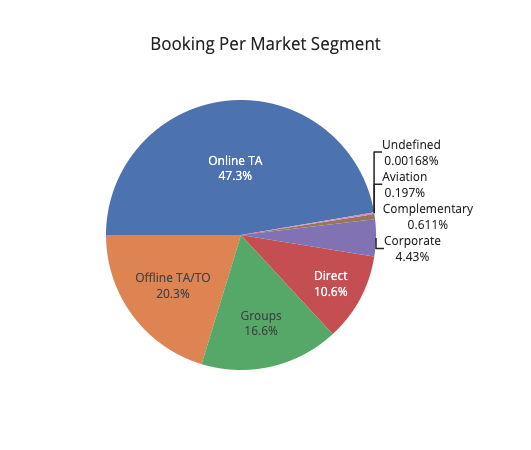

In [46]:
# plot the numbers with pie chart
fig= px.pie(segments,
           values=segments.values,
           names=segments.index,
           title='Booking Per Market Segment',
           template='seaborn')
fig.update_traces(rotation=-90, textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

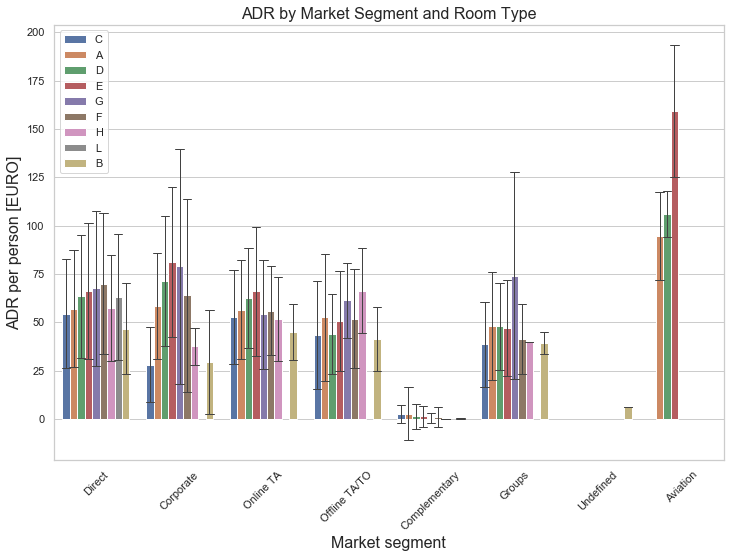

In [47]:
# view the price per night per person by room types of market segments.
plt.figure(figsize=(12,8))
sns.barplot(x='market_segment',
           y='adr_pp',
           hue='reserved_room_type',
           data=full_data_cln,
           ci='sd',
           errwidth=1,
           capsize=0.1)

plt.title('ADR by Market Segment and Room Type', fontsize=16)
plt.ylabel('ADR per person [EURO]', fontsize=16)
plt.xlabel('Market segment', fontsize=16)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [48]:
# obtain average price per person by market segments
avg_mk=full_data_cln[['market_segment','adr_pp']].groupby(['market_segment'], as_index=False).mean()
avg_mk

market_segment      adr_pp
0       Aviation  100.270979
1  Complementary    2.092894
2      Corporate   59.883539
3         Direct   60.309133
4         Groups   47.875831
5  Offline TA/TO   51.342702
6      Online TA   58.188158
7      Undefined    6.000000

On average, 'Group' received the best price and 'Aviation' pay almost twice as much as 'Group'
Let's explore the reasons behind the high prices by 'Aviation.'

In [49]:
# create a dataframe with relevant data of 'Aviation' and get basic statistics
Avi_data=full_data_cln.loc[full_data_cln['market_segment']=='Aviation'][['is_canceled',
                                                                        'adults',
                                                                        'children',
                                                                        'lead_time',
                                                                        'adr_pp']].describe()

In [50]:
# create a dataframe with relevant data of the rest and get basic statistics
Non_avi_data=full_data_cln.loc[full_data_cln['market_segment']!='Aviation'][['is_canceled',
                                                                        'adults',
                                                                        'children',
                                                                        'lead_time',
                                                                        'adr_pp']].describe()

In [51]:
Avi_data

is_canceled      adults  children  lead_time      adr_pp
count   235.000000  235.000000     235.0  235.00000  235.000000
mean      0.221277    1.012766       0.0    4.47234  100.270979
std       0.415992    0.112503       0.0    4.61629   20.376689
min       0.000000    1.000000       0.0    0.00000    0.000000
25%       0.000000    1.000000       0.0    1.00000   95.000000
50%       0.000000    1.000000       0.0    3.00000   95.000000
75%       0.000000    1.000000       0.0    6.00000  110.000000
max       1.000000    2.000000       0.0   23.00000  193.500000

In [52]:
Non_avi_data

is_canceled         adults       children      lead_time  \
count  118975.000000  118975.000000  118975.000000  118975.000000   
mean        0.371061       1.860878       0.104249     104.306031   
std         0.483091       0.574499       0.399202     106.888885   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000      18.000000   
50%         0.000000       2.000000       0.000000      69.000000   
75%         1.000000       2.000000       0.000000     161.000000   
max         1.000000      55.000000      10.000000     737.000000   

              adr_pp  
count  118975.000000  
mean       55.036835  
std        29.017596  
min        -3.190000  
25%        37.440000  
50%        49.500000  
75%        66.000000  
max      2700.000000

- By comparing the mean value of lead time, we can see that Aviation's bookings were made 4 days before on average while the rest 104 days before on average.
- From the statistics of 'adult' and 'children' column, it seems that aviation companies mostly reserved 1 room for 1 person without any additional guests. On the other hand, the rest of market segments had additional guest for 1 room reservation.  
- Shorter lead time and single-guest room use may cause higher average daily price per person for Aviation company. 

### How many bookings were canceled? 

In [53]:
# number of total cancellation
total_can=full_data_cln['is_canceled'].sum()
print(total_can)

44199


In [54]:
# number of cancellation at Resort hotel
resort_can=full_data_cln.loc[full_data_cln['hotel']=='Resort Hotel']['is_canceled'].sum()
print(resort_can)

11120


In [55]:
# number of cancellation at City hotel
city_can=full_data_cln.loc[full_data_cln['hotel']=='City Hotel']['is_canceled'].sum()
print(city_can)

33079


In [56]:
# cancellations above in percentage
per_total_can=total_can/full_data_cln.shape[0]*100
per_resort_can=resort_can/full_data_cln.loc[full_data_cln['hotel']=='Resort Hotel'].shape[0]*100
per_city_can=resort_can/full_data_cln.loc[full_data_cln['hotel']=='City Hotel'].shape[0]*100

In [57]:
# print summary
print(f"Total booking cancellation: {total_can:,}({per_total_can:.0f}%)")
print(f"Resort Hotel's booking cancellation: {resort_can:,}({per_resort_can:.0f}%)")
print(f"City Hotel's booking cancellation: {city_can:,}({per_city_can:.0f}%)")

Total booking cancellation: 44,199(37%)
Resort Hotel's booking cancellation: 11,120(28%)
City Hotel's booking cancellation: 33,079(14%)


### Which month had the highest cancellations rate?

In [58]:
# number of reservations for Resort Hotel by month
resort_mb=full_data_cln.loc[full_data_cln['hotel']=='Resort Hotel'].groupby('arrival_date_month')['hotel'].count()
resort_mb

arrival_date_month
April        3609
August       4894
December     2645
February     3102
January      2191
July         4573
June         3044
March        3334
May          3559
November     2435
October      3553
September    3108
Name: hotel, dtype: int64

In [59]:
# number of cancellation of Resort Hotel by month
resort_mc=full_data_cln.loc[full_data_cln['hotel']=='Resort Hotel'].groupby('arrival_date_month')['is_canceled'].sum()
resort_mc

arrival_date_month
April        1059
August       1637
December      631
February      794
January       325
July         1436
June         1007
March         763
May          1024
November      460
October       978
September    1006
Name: is_canceled, dtype: int64

In [60]:
# number of reservations for City Hotel by month
city_mb=full_data_cln.loc[full_data_cln['hotel']=='City Hotel'].groupby('arrival_date_month')['hotel'].count()
city_mb

arrival_date_month
April        7469
August       8967
December     4114
February     4950
January      3730
July         8071
June         7885
March        6434
May          8221
November     4336
October      7594
September    7392
Name: hotel, dtype: int64

In [61]:
# number of cancellation of City Hotel by month
city_mc=full_data_cln.loc[full_data_cln['hotel']=='City Hotel'].groupby('arrival_date_month')['is_canceled'].sum()
resort_mc

arrival_date_month
April        1059
August       1637
December      631
February      794
January       325
July         1436
June         1007
March         763
May          1024
November      460
October       978
September    1006
Name: is_canceled, dtype: int64

In [62]:
# create two dataframes with data above
resort_can_data=pd.DataFrame({'Hotel':'Resort Hotel',
                             'Month':list(resort_mb.index),
                             'Reservation':list(resort_mb.values),
                             'Cancellation':list(resort_mc.values)})
city_can_data=pd.DataFrame({'Hotel':'City Hotel',
                             'Month':list(city_mb.index),
                             'Reservation':list(city_mb.values),
                             'Cancellation':list(city_mc.values)})
resort_can_data.head()

Hotel     Month  Reservation  Cancellation
0  Resort Hotel     April         3609          1059
1  Resort Hotel    August         4894          1637
2  Resort Hotel  December         2645           631
3  Resort Hotel  February         3102           794
4  Resort Hotel   January         2191           325

In [63]:
city_can_data.head()

Hotel     Month  Reservation  Cancellation
0  City Hotel     April         7469          3459
1  City Hotel    August         8967          3600
2  City Hotel  December         4114          1737
3  City Hotel  February         4950          1899
4  City Hotel   January         3730          1481

In [64]:
# combine two dataframe into one. 
full_can_data=pd.concat([resort_can_data,city_can_data], ignore_index=True)
full_can_data.head(24)

Hotel      Month  Reservation  Cancellation
0   Resort Hotel      April         3609          1059
1   Resort Hotel     August         4894          1637
2   Resort Hotel   December         2645           631
3   Resort Hotel   February         3102           794
4   Resort Hotel    January         2191           325
5   Resort Hotel       July         4573          1436
6   Resort Hotel       June         3044          1007
7   Resort Hotel      March         3334           763
8   Resort Hotel        May         3559          1024
9   Resort Hotel   November         2435           460
10  Resort Hotel    October         3553           978
11  Resort Hotel  September         3108          1006
12    City Hotel      April         7469          3459
13    City Hotel     August         8967          3600
14    City Hotel   December         4114          1737
15    City Hotel   February         4950          1899
16    City Hotel    January         3730          1481
17    City Hotel       July         8071          3301
18    City Hotel       June         7885          3527
19    City Hotel      March         6434          2385
20    City Hotel        May         8221          3653
21    City Hotel   November         4336          1660
22    City Hotel    October         7594          3268
23    City Hotel  September         7392          3109

In [65]:
# add the column giving information about cancellation percentages
full_can_data['cancel percent']=full_can_data['Cancellation']/full_can_data['Reservation']*100
full_can_data.head()

Hotel     Month  Reservation  Cancellation  cancel percent
0  Resort Hotel     April         3609          1059       29.343308
1  Resort Hotel    August         4894          1637       33.449121
2  Resort Hotel  December         2645           631       23.856333
3  Resort Hotel  February         3102           794       25.596389
4  Resort Hotel   January         2191           325       14.833409

In [66]:
# sort data by month
full_can_data['Month']=pd.Categorical(full_can_data['Month'], categories=ordered_months, ordered=True)

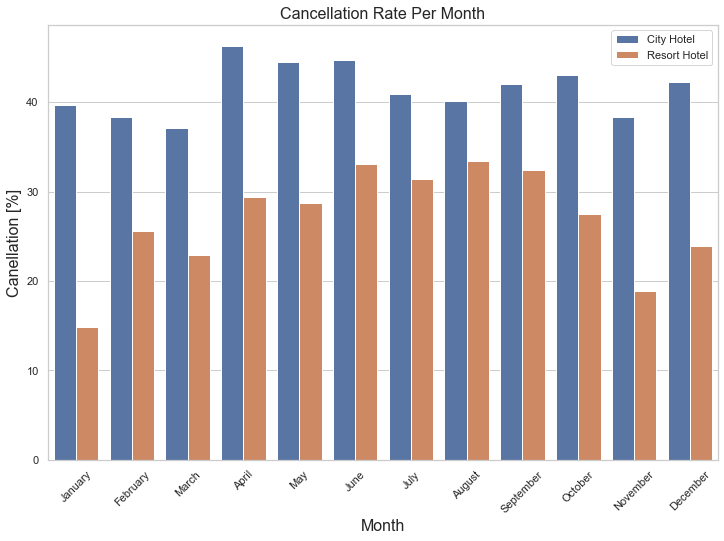

In [69]:
# plot the dataframe with barplot
plt.figure(figsize=(12,8))

sns.barplot(x='Month', y='cancel percent', data=full_can_data,
           hue='Hotel', hue_order=['City Hotel','Resort Hotel'])

plt.title('Cancellation Rate Per Month', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Canellation [%]', fontsize=16)
plt.legend(loc='upper right')
plt.show()

As for City Hotel, their cancellation rate remain around 40% throught the year. 
On the other hand, Resort Hotel's cancellation rate was relatively higher in summer and lower in winter.
Overall, the cancellation rate of City Hotel was higher than that of Resort Hotel.